#                                      Google Stock Data Prediction

# Importing the Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Loading the data into Dataframe

In [2]:
Stock_Data=pd.read_csv('google stock data.csv')
Stock_Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


# Basic EDA

In [3]:
Stock_Data.head() # By default it will first  5 rows of dataset.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
Stock_Data.tail() # By default it will shows Last 5 rows of dataset.

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


In [5]:
Stock_Data.shape   # 4431 Rows & 7 Columns

(4431, 7)

In [6]:
Stock_Data.columns # it will shows all columns name present in dataset.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Checking the Data types of each column

In [7]:
#Here we check the datatypes because sometimes any numeric data would be stored as string.
# If in that case,We have to convert that string to integer data only then we can plot the data via graph.

In [8]:
Stock_Data.dtypes  # it will shows data type of each column.

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
Stock_Data.describe() # It will give the Staticstical information about the data
                      # It will give info of numerical columns only.

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [10]:
Stock_Data.value_counts() #function return a Series containing counts of unique values

Date        Open         High         Low          Close        Adj Close    Volume  
2004-08-19  50.050049    52.082081    48.028027    50.220219    50.220219    44659096    1
2016-05-11  740.520020   740.799988   727.900024   730.549988   730.549988   1491700     1
2016-05-19  718.299988   720.500000   710.309998   715.309998   715.309998   1529900     1
2016-05-18  718.500000   725.570007   715.020020   721.780029   721.780029   1626800     1
2016-05-17  731.059998   735.849976   718.000000   720.190002   720.190002   1670200     1
                                                                                        ..
2010-07-09  236.216217   236.866867   231.621628   233.978973   233.978973   8654337     1
2010-07-12  236.421417   239.959961   235.775772   238.153152   238.153152   6662131     1
2010-07-13  241.366364   246.741745   240.380386   244.844849   244.844849   7944647     1
2010-07-14  245.185181   247.162155   243.473480   245.915909   245.915909   6229764     1
2022

# Dropping the Irrelevant Columns:

In [11]:
#Columns that are not being used for further analysis, then we can drop them

In [12]:
Stock_Data.drop('Adj Close', axis=1, inplace=True)

In [13]:
Stock_Data

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602
...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,1257700


# Remove all the Outliers if exists in the dataset:

(4431, 6)

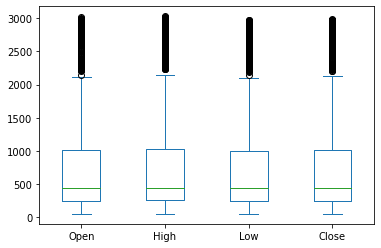

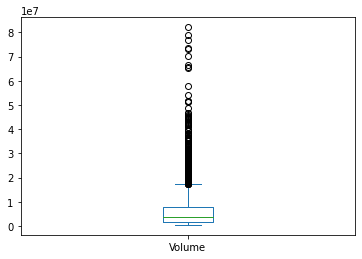

In [14]:
#plotting the boxplot to detect outliers.
Stock_Data[['Open','High','Low','Close',]].plot(kind='box')
Stock_Data[['Volume']].plot(kind='box')
Stock_Data.shape

In [15]:
# Detecting oulires from entire dataset using Inter Quantile Range(IQR)

Q1=Stock_Data.quantile(0.25)  #Q1 represents the 25th percentile of the data.

Q3=Stock_Data.quantile(0.75)  #Q3 represents the 75th percentile of the data.

IQR=Q3-Q1 # Inter Quantile Range

print(IQR)

Open      7.588064e+02
High      7.697966e+02
Low       7.514617e+02
Close     7.593741e+02
Volume    6.306790e+06
dtype: float64


In [16]:
# remove the Ouliers from entire dataset
Stock_Data=Stock_Data[~((Stock_Data<(Q1-1.5*IQR))|(Stock_Data>(Q3+1.5*IQR))).any(axis=1)]
Stock_Data.shape

(3861, 6)

<AxesSubplot:>

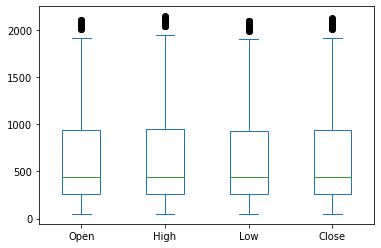

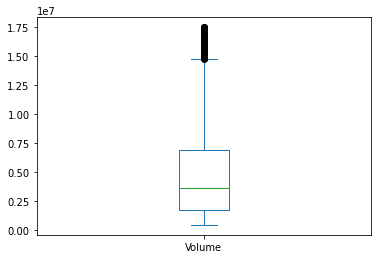

In [17]:
#plotting the boxplot
Stock_Data[['Open','High','Low','Close',]].plot(kind='box')
Stock_Data[['Volume']].plot(kind='box')

In [18]:
Stock_Data['Date']=pd.to_datetime(Stock_Data.Date)

In [19]:
Stock_Data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

# Checking the duplicate rows in the dataset 

In [20]:
duplicate_rows=Stock_Data[Stock_Data.duplicated()]
duplicate_rows

,Date,Open,High,Low,Close,Volume


Here we can see that ,there is no duplicate rows present in the dataset.If duplicate data was present in our dataset in large amount,then we have remove it.

# Handling Missing Values:

In [21]:
#checking the count of null values

Stock_Data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Here we can see that there is no Null value is present in any column of the dataset.

# Handling the skewness if exists in dataset

The shape describe the type of graph

In [22]:
from scipy.stats import skew

In [23]:
Stock_Data.head()

,Date,Open,High,Low,Close,Volume
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602
5,2004-08-26,52.527527,54.029030,52.382381,54.009010,7094898
6,2004-08-27,54.104103,54.364365,52.897900,53.128128,6211782
7,2004-08-30,52.692692,52.797798,51.056057,51.056057,5196798


if skewed values lied between -1 to greater than +1, then our data is heavily skewed.

Skewness of Open is: 1.0414285641685608


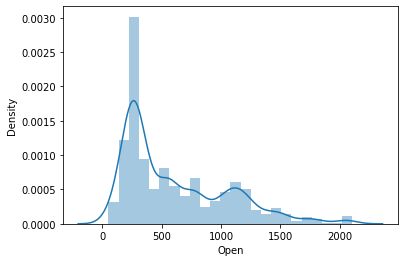

Skewness of High is: 1.0502918405290051


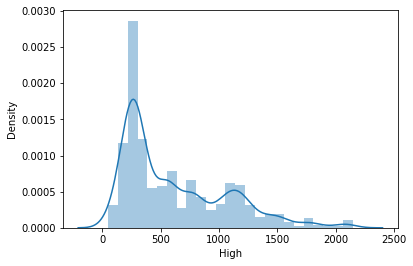

Skewness of Low is: 1.038413327280627


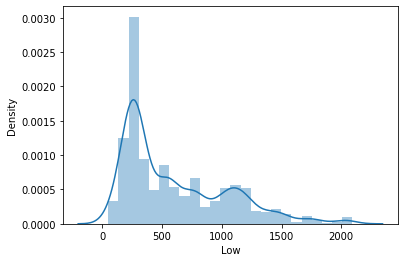

Skewness of Close is: 1.0439923910642186


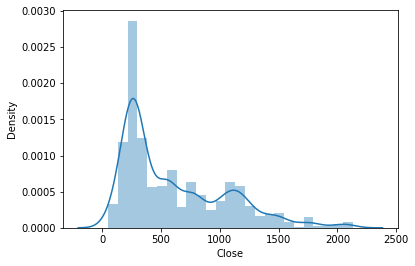

Skewness of Volume is: 1.2095555541338792


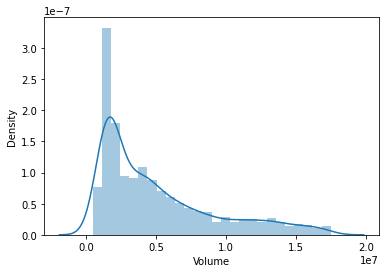

In [24]:
col_nums=Stock_Data[['Open','High','Low','Close','Volume']]
col_nums

for i in col_nums:
    print(f"Skewness of {i} is: {skew(Stock_Data[i])}")
    
    sns.distplot(col_nums[i])
    plt.show()

# Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. 

<AxesSubplot:>

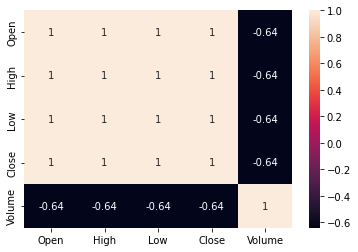

In [25]:
# ploting the heatmap for dataset
sns.heatmap(col_nums.corr(),annot=True)

• Now we have to remove the skewness for only those column where correlation with target is not that great.

• here we can see that volume is the only column where correlation value with close is not good

• so we have to remove skewness from volume column.


In [26]:
Stock_Data['Volume']=skew(Stock_Data['Volume'])
print(f"Skewness of Volume is",skew(Stock_Data['Volume']))

Skewness of Volume is 0.0


# Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between opening price and closing Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

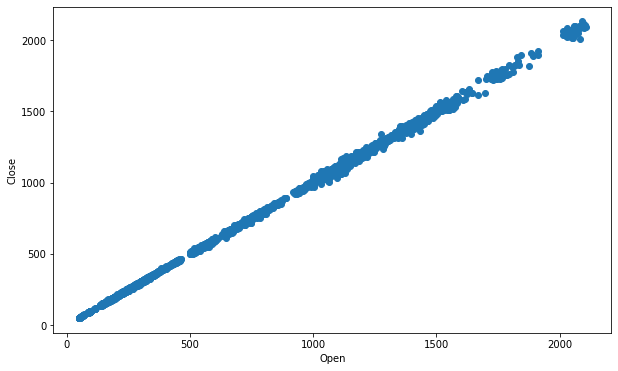

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(Stock_Data['Open'], Stock_Data['Close'])
ax.set_xlabel('Open')
ax.set_ylabel('Close')
plt.show()

In [28]:
Stock_Data

,Date,Open,High,Low,Close,Volume
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,1.209556
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,1.209556
5,2004-08-26,52.527527,54.029030,52.382381,54.009010,1.209556
6,2004-08-27,54.104103,54.364365,52.897900,53.128128,1.209556
7,2004-08-30,52.692692,52.797798,51.056057,51.056057,1.209556
...,...,...,...,...,...,...
4179,2021-03-26,2031.790039,2039.390015,2003.849976,2024.729980,1.209556
4180,2021-03-29,2022.160034,2049.209961,2005.449951,2045.790039,1.209556
4181,2021-03-30,2052.979980,2062.669922,2036.150024,2046.469971,1.209556
4182,2021-03-31,2054.399902,2086.260010,2047.000000,2062.520020,1.209556


<AxesSubplot:xlabel='Date'>

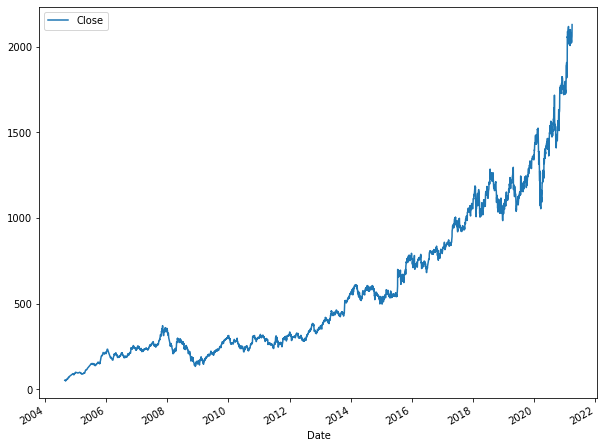

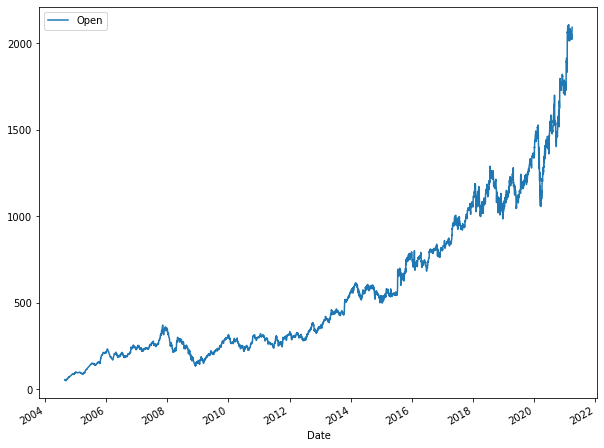

In [29]:
Stock_Data.plot(x='Date',y='Close',figsize=(10,8))
Stock_Data.plot(x='Date',y='Open',figsize=(10,8))


In [53]:
# Separating the independent variables from dependent variables

x = Stock_Data[['Open','High','Low',]]
x

,Open,High,Low
3,55.675674,55.855858,51.836838
4,52.532532,54.054054,51.991993
5,52.527527,54.029030,52.382381
6,54.104103,54.364365,52.897900
7,52.692692,52.797798,51.056057
...,...,...,...
4179,2031.790039,2039.390015,2003.849976
4180,2022.160034,2049.209961,2005.449951
4181,2052.979980,2062.669922,2036.150024
4182,2054.399902,2086.260010,2047.000000


In [54]:
y=Stock_Data['Close']
y

3         52.487488
4         53.053055
5         54.009010
6         53.128128
7         51.056057
           ...     
4179    2024.729980
4180    2045.790039
4181    2046.469971
4182    2062.520020
4183    2129.780029
Name: Close, Length: 3861, dtype: float64

# Train Test Split

In [55]:
#Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import StandardScaler

#For Model Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error


In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [57]:
xtrain.shape

(2702, 3)

In [58]:
xtest.shape

(1159, 3)

# Training and Fitting the model


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
LinReg=LinearRegression()

In [61]:
LinReg.fit(xtrain,ytrain)

LinearRegression()

In [62]:
print(LinReg.coef_)

[-0.56294418  0.81329917  0.74919208]


In [63]:
print(LinReg.intercept_)

0.16942478900250535


In [64]:
ypredict=LinReg.predict(xtest)

In [65]:
print(xtest)

             Open         High          Low
1450   240.605606   245.140137   238.638641
2179   393.768768   395.815826   389.439453
2803   677.400024   678.739990   658.109985
1301   276.621613   277.077087   274.639648
190    120.725723   120.955956   119.944946
...           ...          ...          ...
2054   376.301300   377.812805   372.422424
3376  1136.359985  1139.319946  1123.489990
968    272.842834   275.870880   267.817810
2868   731.950012   735.080017   719.559998
491    192.747742   193.078079   187.942947

[1159 rows x 3 columns]


In [66]:
ypredict.shape

(1159,)

In [67]:
Stock_Dataframe=pd.DataFrame(ytest,ypredict)

In [68]:
Data=pd.DataFrame({'Actual Price':ytest,'Predicted price':ypredict})

In [69]:
Data.head(25)

,Actual Price,Predicted price
1450,238.818817,242.880348
2179,391.671661,392.181223
2803,670.000000,663.900479
1301,276.321320,275.551310
190,120.925926,120.442763
1703,259.389374,261.125804
4166,2040.359985,2049.914320
2656,559.849976,562.944984
2207,441.076080,444.515894
1488,233.323318,233.008969


In [70]:
LinReg.score(xtest,ytest)

0.9998796448473543

In [71]:
LinReg.score(xtrain,ytrain)

0.9999014556481864

<AxesSubplot:>

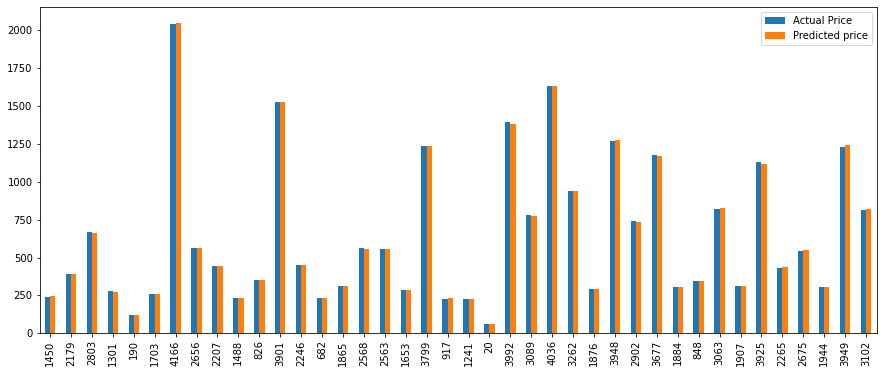

In [72]:
Data.head(40).plot(kind="bar",figsize=(15,6))

In [73]:
import math

In [74]:
print(f"MAE: {mean_absolute_error(ytest, ypredict)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ypredict))}")
print(f"Accuracy of model: {r2_score(ytest, ypredict) * 100}")

MAE: 2.629091656454598
RMSE: 4.826619128006954
Accuracy of model: 99.98796448473543


# Prediction for Unknown Data:

In [78]:
LinReg.predict([[20,24,17.45],[43,23,30],[20,54,34],[23,43,27]])

array([21.50312296, 17.14446817, 58.30122691, 42.42175896])

In [79]:
Open=float(input("Enter the opening price of share:"))
High=float(input("Enter the Highest price of share:"))
Low=float(input("Enter the Lowest price of share:"))

Stock=[[Open,High,Low]]
Close=LinReg.predict(Stock)
print(f"Closing price for share will be {Close}")

Enter the opening price of share:45
Enter the Highest price of share:67
Enter the Lowest price of share:65
Closing price for share will be [78.02546597]
